Задание 1

In [889]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [890]:
df = pd.read_csv('shopping_trends.csv')

In [891]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [892]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

Задание 2.1

Гипотеза 1: Кредитными картами расплачиваются чаще всего.

In [893]:
customers_by_payment_method = df.groupby("Payment Method")["Customer ID"].count()

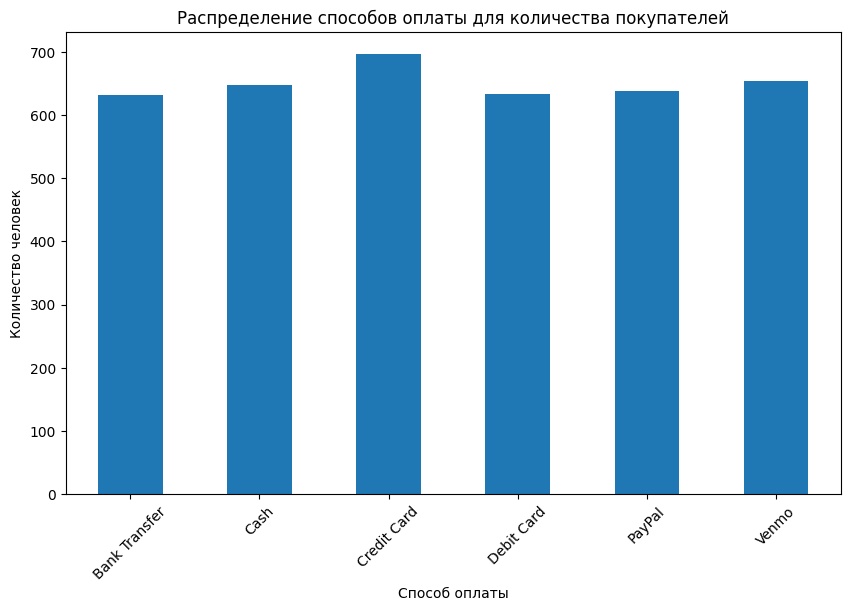

In [894]:
plt.figure(figsize=(10, 6))
customers_by_payment_method.plot(kind="bar")
plt.title("Распределение способов оплаты для количества покупателей")
plt.xlabel("Способ оплаты")
plt.ylabel("Количество человек")
plt.xticks(rotation=45)
plt.show()

In [895]:
customers_by_payment_method

Payment Method
Bank Transfer    632
Cash             648
Credit Card      696
Debit Card       633
PayPal           638
Venmo            653
Name: Customer ID, dtype: int64

Вывод: Да, кредитными картами расплачиваются чаще, чем другими способами оплаты.

Гипотеза 2: Женщины чаще выбирают яркие цвета, а мужчины - более сдержанные. Для каждого цвета поставим в соответствие числовое значение яркости, где яркий цвет - 1, а тусклый - 0.

In [896]:
df['Color'].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

In [897]:
color_mapping = {
    "Annually": 1,
    "Gray": 0,
    "Maroon": 0,
    "Turquoise": 1,
    "White": 1,
    "Charcoal": 0,
    "Silver": 1,
    "Pink": 1,
    "Purple": 1,
    "Olive": 0,
    "Gold": 1,
    "Violet": 1,
    "Teal": 1,
    "Lavender": 1,
    "Black": 0,
    "Green": 1,
    "Peach": 1,
    "Red": 1,
    "Cyan": 1,
    "Brown": 0,
    "Beige": 1,
    "Orange": 1,
    "Indigo": 1,
    "Yellow": 1,
    "Magenta": 1,
    "Blue": 1
}

In [898]:
df['Color Feature'] = df['Color'].map(color_mapping)

In [899]:
df[['Color Feature']]

,Color Feature
0,0
1,0
2,0
3,0
4,1
...,...
3895,1
3896,1
3897,1
3898,0


In [900]:
gender_color_mean = df.groupby('Gender')['Color Feature'].mean()

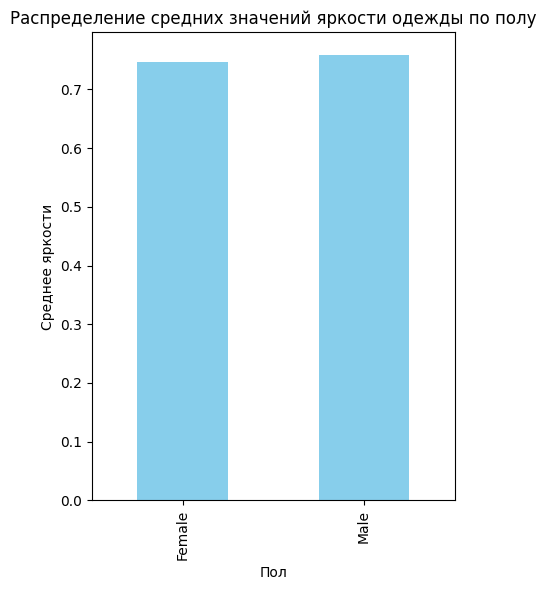

Gender
Female    0.746795
Male      0.759050
Name: Color Feature, dtype: float64

In [901]:
plt.figure(figsize=(12, 6))

plt.subplot(131)
gender_color_mean.plot(kind='bar', title='Распределение средних значений яркости одежды по полу', color='skyblue')
plt.xlabel('Пол')
plt.ylabel('Среднее яркости')

plt.tight_layout()
plt.show()

gender_color_mean

Вывод: у женщин и мужчин приблизительно одинаковые предпочтения к цвету товара.

Гипотеза 3: Клиенты, покупающие товары со скидкой, совершают более дорогие покупки.

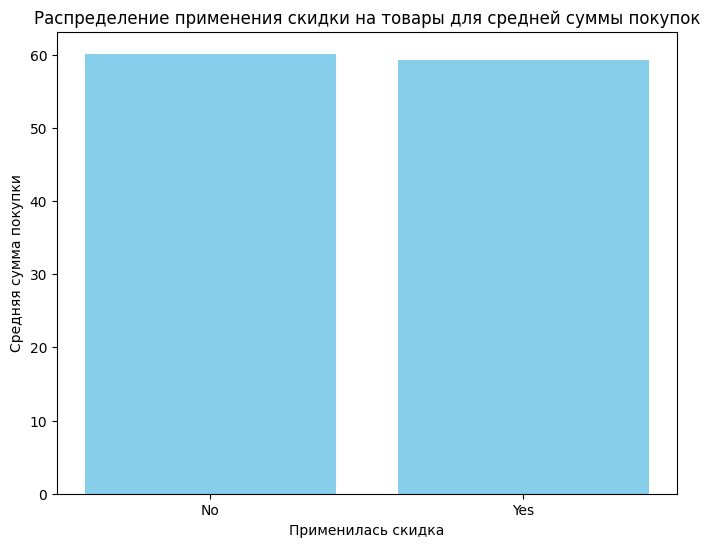

In [902]:
average_purchase_by_discount = df.groupby('Discount Applied')['Purchase Amount (USD)'].mean()

plt.figure(figsize=(8, 6))
plt.bar(average_purchase_by_discount.index, average_purchase_by_discount.values, color='skyblue')
plt.title('Распределение применения скидки на товары для средней суммы покупок')
plt.xlabel('Применилась скидка')
plt.ylabel('Средняя сумма покупки')

plt.show()

In [903]:
average_purchase_by_discount

Discount Applied
No     60.130454
Yes    59.279070
Name: Purchase Amount (USD), dtype: float64

Вывод: обычно клиенты не совершают более дорогих покупок со скидкой.

Гипотеза 4: Худи покупают в основном молодые люди, нежели взрослые.

In [904]:
age_bins = [0, 18, 35, 50, 100]
age_labels = ["<18", "18-35", "36-50", "50+"]

df["Age Category"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)

In [905]:
df["Age Category"]

0         50+
1       18-35
2       36-50
3       18-35
4       36-50
        ...  
3895    36-50
3896      50+
3897    36-50
3898    36-50
3899      50+
Name: Age Category, Length: 3900, dtype: category
Categories (4, object): ['<18' < '18-35' < '36-50' < '50+']

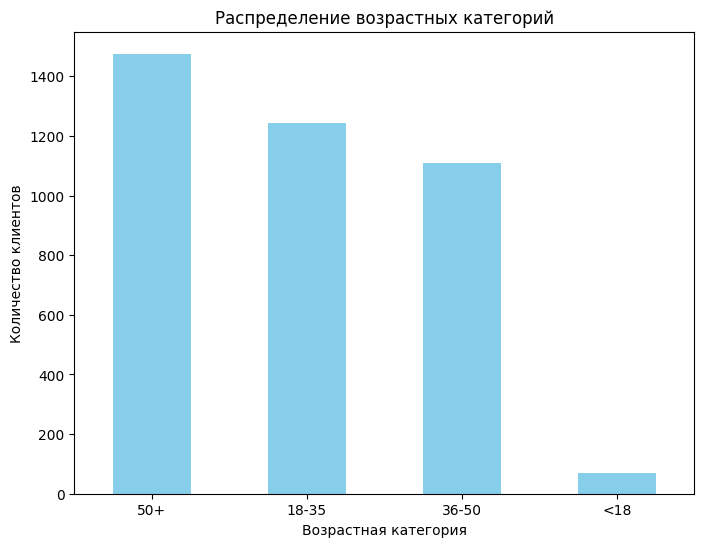

In [906]:
age_category_counts = df["Age Category"].value_counts()

plt.figure(figsize=(8, 6))
age_category_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение возрастных категорий')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=0)
plt.show()

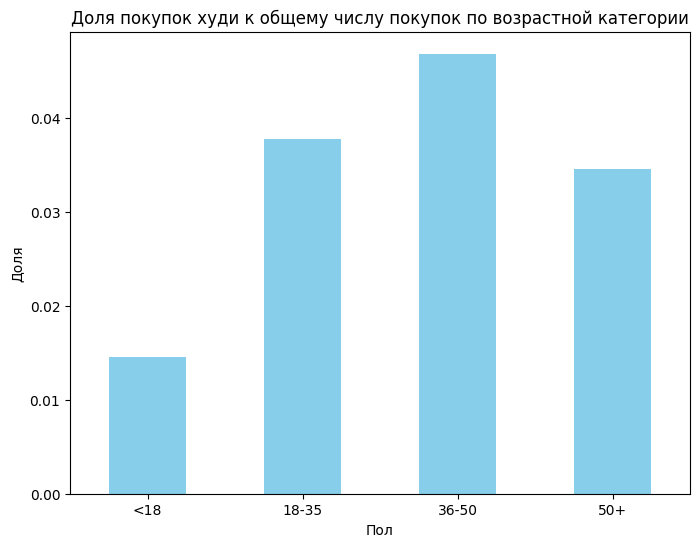

<Figure size 640x480 with 0 Axes>

Пол, доля покупок худи от общего числа покупок которого больше: 36-50


In [907]:
count_hoodie_purchases = df[df["Item Purchased"] == "Hoodie"].groupby("Age Category", observed=True)["Item Purchased"].count()
# Группируем данные по возрасту и подсчитываем общее количество покупок
total_hoodie_purchase_count = df.groupby("Age Category", observed=True)["Item Purchased"].count()

# Вычисляем долю количества покупок худи от общего числа покупок по каждой возрастной категории
percentage_hoodie_purchases = count_hoodie_purchases / total_hoodie_purchase_count

# Определяем возрастную категорию, доля покупок худи от общего числа покупок которого больше
most_hoodie_purchases = percentage_hoodie_purchases.idxmax()

plt.figure(figsize=(8, 6))
percentage_hoodie_purchases.plot(kind='bar', color='skyblue')
plt.title('Доля покупок худи к общему числу покупок по возрастной категории')
plt.xlabel('Пол')
plt.ylabel('Доля')
plt.xticks(rotation=0)
plt.show()

plt.tight_layout()
plt.show()

print(f"Пол, доля покупок худи от общего числа покупок которого больше: {most_hoodie_purchases}")

Вывод: худи покупают в основном взрослые люди.

Гипотеза 5: Доля промокодов, которые применяют скидку на покупку, больше, чем промокодов, не дающих скидку, а например другие бонусы.

In [908]:
result = df[(df["Discount Applied"] == "No") & (df["Promo Code Used"] == "Yes")]
result

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Color Feature,Age Category


Вывод: все используемые промокоды гарантированно дают скидку.

Гипотеза 6: Подписка позволяет клиентам использовать промокоды чаще, чем без нее.

In [909]:
cross_tab = pd.crosstab(df["Subscription Status"], df["Promo Code Used"])

print(cross_tab)

Promo Code Used        No   Yes
Subscription Status            
No                   2223   624
Yes                     0  1053


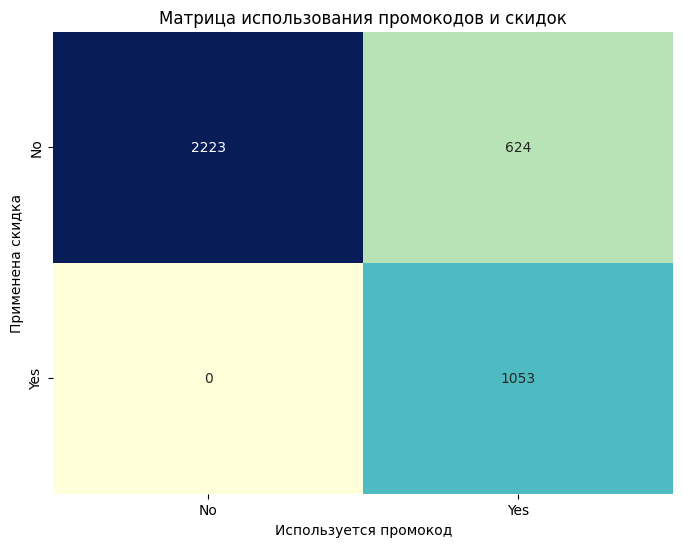

In [910]:
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title("Матрица использования промокодов и скидок")
plt.xlabel("Используется промокод")
plt.ylabel("Применена скидка")
plt.show()

Вывод: Да, количество примененных промокодов с подпиской больше, чем без нее.

Задание 2.2

In [911]:
popular_item = df['Item Purchased'].value_counts().idxmax()
print("Самый популярный товар:", popular_item)

Самый популярный товар: Blouse


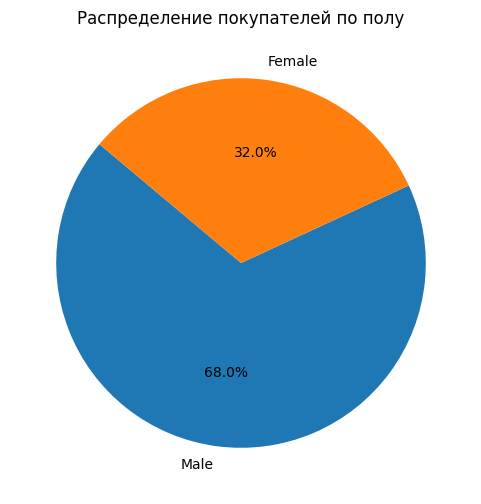

In [912]:
gender_distribution = df['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение покупателей по полу')

plt.show()

In [913]:
df['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

Сделаем маппинг текстового значения частоты на числовое (1 - наиболее редко, а 5 - наиболее часто)

In [914]:
frequency_mapping = {
    "Annually": 1,
    "Quarterly": 2,
    "Every 3 Months": 2,
    "Monthly": 3,
    "Bi-Weekly": 4,
    "Fortnightly": 4,
    "Weekly": 5
}

In [915]:
df['Frequency Numeric'] = df['Frequency of Purchases'].map(frequency_mapping)


In [916]:
df[['Frequency Numeric']]

,Frequency Numeric
0,4
1,4
2,5
3,5
4,1
...,...
3895,5
3896,4
3897,2
3898,5


Рассчитаем общее количество покупок каждого конкретного пользователя

In [917]:
df['Total Purchases'] = df['Previous Purchases'] + 1

In [918]:
df[['Total Purchases']]

,Total Purchases
0,15
1,3
2,24
3,50
4,32
...,...
3895,33
3896,42
3897,25
3898,25


In [919]:
df['Purchase Amount (USD)'].max()

100

Gender
Female    0.008814
Male      0.009427
Name: Purchase Amount (USD), dtype: float64


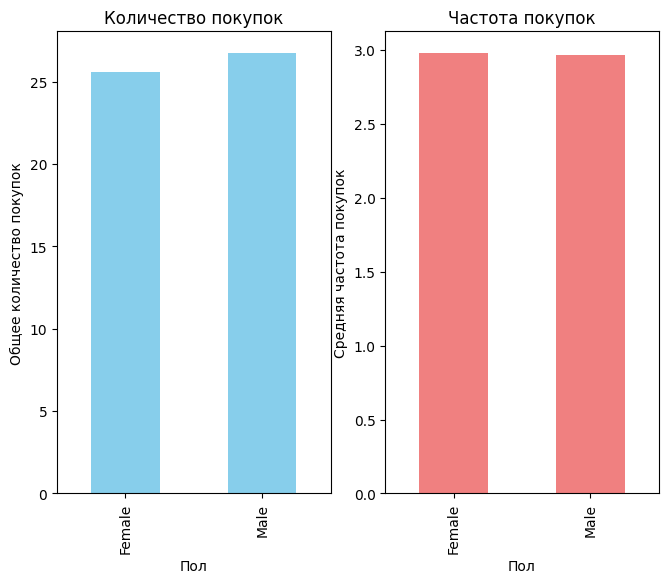

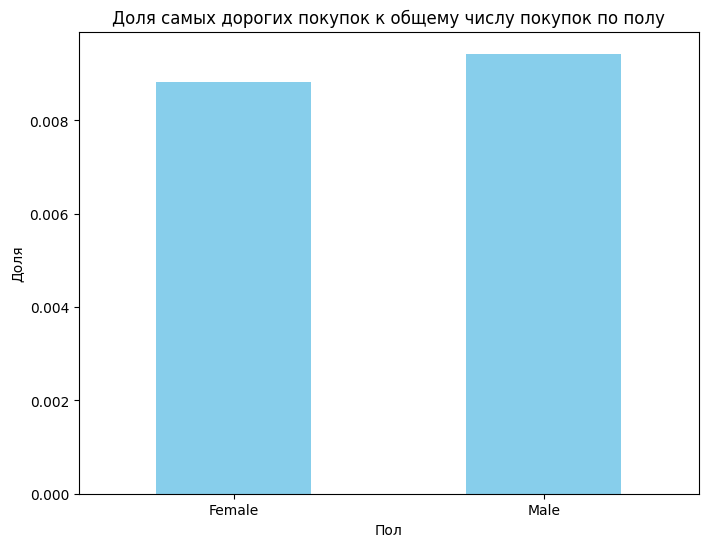

<Figure size 640x480 with 0 Axes>

Пол с наибольшими количеством покупок: Male
Пол, который чаще всего совершает покупки: Female
Пол, доля самых дорогих покупок к общему числу покупок которого больше: Male


In [920]:
# Группировка данных по полу и агрегация
gender_purchase_totals = df.groupby('Gender')['Total Purchases'].mean()
gender_purchase_frequencies = df.groupby('Gender')['Frequency Numeric'].mean()
count_expensive_purchases = df[df['Purchase Amount (USD)'] == 100].groupby('Gender')['Purchase Amount (USD)'].count()

# Определение пола с наибольшими общими покупками
max_purchases_gender = gender_purchase_totals.idxmax()

# Определение пола, который чаще всего совершает покупки
most_frequent_gender = gender_purchase_frequencies.idxmax()

# Группируем данные по полу и подсчитываем общее количество покупок
total_purchase_count = df.groupby('Gender')['Purchase Amount (USD)'].count()

# Вычисляем долю количества самых дорогих покупок от общего числа покупок по каждому полу
percentage_expensive_purchases = count_expensive_purchases / total_purchase_count

# Определение пола, доля самых дорогих покупок от общего числа покупок которого больше
most_expensive_purchases = percentage_expensive_purchases.idxmax()

print(percentage_expensive_purchases)

plt.figure(figsize=(12, 6))

plt.subplot(131)
gender_purchase_totals.plot(kind='bar', title='Количество покупок', color='skyblue')
plt.xlabel('Пол')
plt.ylabel('Общее количество покупок')

plt.subplot(132)
gender_purchase_frequencies.plot(kind='bar', title='Частота покупок', color='lightcoral')
plt.xlabel('Пол')
plt.ylabel('Средняя частота покупок')

plt.figure(figsize=(8, 6))
percentage_expensive_purchases.plot(kind='bar', color='skyblue')
plt.title('Доля самых дорогих покупок к общему числу покупок по полу')
plt.xlabel('Пол')
plt.ylabel('Доля')
plt.xticks(rotation=0)
plt.show()

plt.tight_layout()
plt.show()

print(f"Пол с наибольшими количеством покупок: {max_purchases_gender}")
print(f"Пол, который чаще всего совершает покупки: {most_frequent_gender}")
print(f"Пол, доля самых дорогих покупок к общему числу покупок которого больше: {most_expensive_purchases}")

In [921]:
df['Age Category'].value_counts()

Age Category
50+      1476
18-35    1244
36-50    1111
<18        69
Name: count, dtype: int64

Age Category
<18      0.028986
18-35    0.011254
36-50    0.008101
50+      0.007453
Name: Purchase Amount (USD), dtype: float64


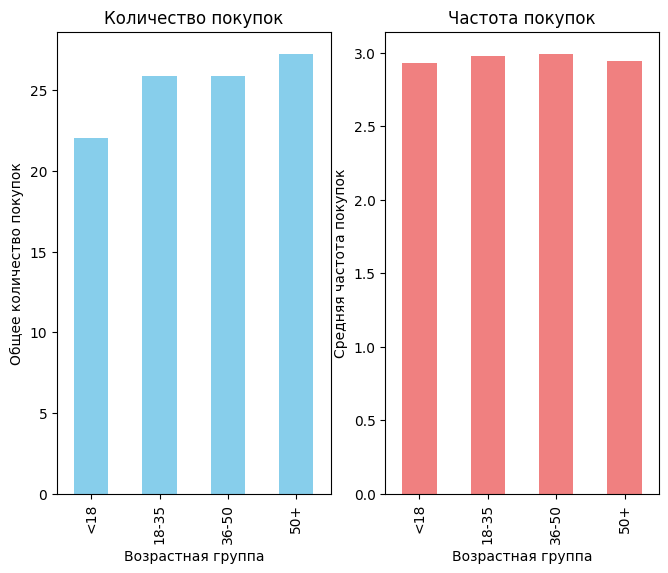

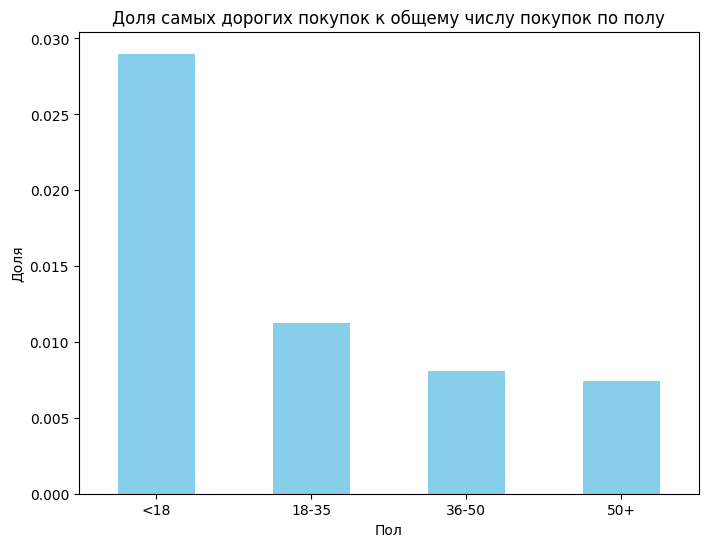

<Figure size 640x480 with 0 Axes>

Возрастная группа с наибольшими количеством покупок: 50+
Возрастная группа, которая чаще всего совершает покупки: 36-50
Возрастная группа, доля самых дорогих покупок к общему числу покупок которой больше: <18


In [922]:
age_group_purchase_totals = df.groupby('Age Category', observed=True)['Total Purchases'].mean()
age_group_purchase_frequencies = df.groupby('Age Category', observed=True)['Frequency Numeric'].mean()
age_group_count_expensive_purchases = df[df['Purchase Amount (USD)'] == 100].groupby('Age Category', observed=True)['Purchase Amount (USD)'].count()

# Группируем данные по возрасту и подсчитываем общее количество покупок
age_group_total_purchase_count = df.groupby('Age Category', observed=True)['Purchase Amount (USD)'].count()

# Вычисляем долю количества самых дорогих покупок от общего числа покупок по каждой категории возраста
age_group_percentage_expensive_purchases = age_group_count_expensive_purchases / age_group_total_purchase_count

# Определение возрастной категории, доля самых дорогих покупок от общего числа покупок которой больше
most_expensive_purchases_age_group = age_group_percentage_expensive_purchases.idxmax()

print(age_group_percentage_expensive_purchases)

# Определение возрастной группы с наибольшими общими покупками
max_purchases_age_group = age_group_purchase_totals.idxmax()

# Определение возрастной группы, которая чаще всего совершает покупки
most_frequent_age_group = age_group_purchase_frequencies.idxmax()

plt.figure(figsize=(12, 6))

plt.subplot(131)
age_group_purchase_totals.plot(kind='bar', title='Количество покупок', color='skyblue')
plt.xlabel('Возрастная группа')
plt.ylabel('Общее количество покупок')

plt.subplot(132)
age_group_purchase_frequencies.plot(kind='bar', title='Частота покупок', color='lightcoral')
plt.xlabel('Возрастная группа')
plt.ylabel('Средняя частота покупок')

plt.figure(figsize=(8, 6))
age_group_percentage_expensive_purchases.plot(kind='bar', color='skyblue')
plt.title('Доля самых дорогих покупок к общему числу покупок по полу')
plt.xlabel('Пол')
plt.ylabel('Доля')
plt.xticks(rotation=0)
plt.show()

plt.tight_layout()
plt.show()

print(f"Возрастная группа с наибольшими количеством покупок: {max_purchases_age_group}")
print(f"Возрастная группа, которая чаще всего совершает покупки: {most_frequent_age_group}")
print(f"Возрастная группа, доля самых дорогих покупок к общему числу покупок которой больше: {most_expensive_purchases_age_group}")

In [923]:
# Создание сводной таблицы для анализа зависимости между цветом одежды и сезоном
pivot_table = pd.pivot_table(df, values='Customer ID', index='Color', columns='Season', aggfunc='count', fill_value=0)

print(pivot_table)

Season     Fall  Spring  Summer  Winter
Color                                  
Beige        34      39      37      37
Black        42      43      42      40
Blue         32      39      46      35
Brown        35      33      33      40
Charcoal     32      42      36      43
Cyan         43      42      42      39
Gold         36      38      30      34
Gray         44      48      40      27
Green        37      38      44      50
Indigo       37      37      32      41
Lavender     38      32      39      38
Magenta      50      37      35      30
Maroon       40      39      35      44
Olive        47      52      35      43
Orange       45      39      37      33
Peach        42      38      24      45
Pink         35      44      29      45
Purple       37      43      38      33
Red          42      31      36      39
Silver       39      37      59      38
Teal         40      46      49      37
Turquoise    27      41      36      41
Violet       44      45      40      37


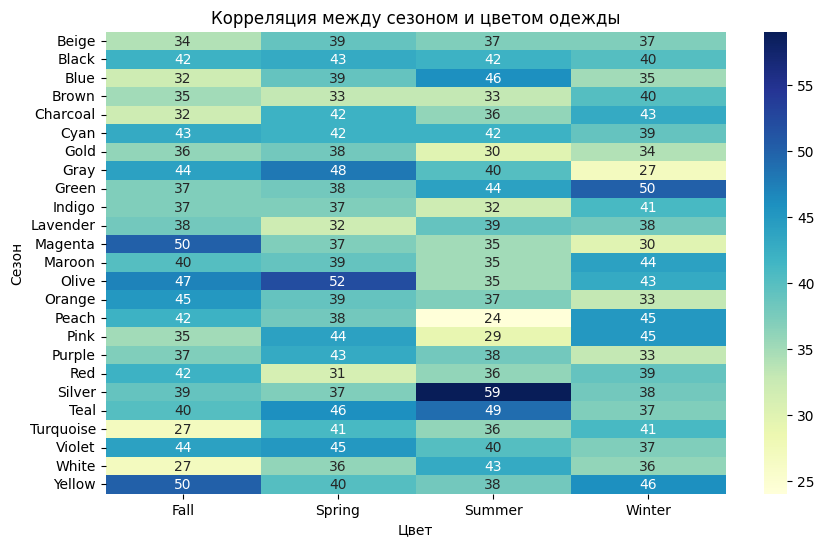

In [924]:
# Визуализация корреляции между сезоном и цветом с помощью тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title("Корреляция между сезоном и цветом одежды")
plt.xlabel("Цвет")
plt.ylabel("Сезон")
plt.show()

Дополнительно: Проверка корреляции с помощью Хи-квадрат

In [925]:
contingency_table = pd.crosstab(df['Season'], df['Color'])

# Выполнение теста Хи-квадрат
chi2, p, _, _ = chi2_contingency(contingency_table)

# Вывод результатов теста
print(f"Значение статистики Хи-квадрат: {chi2}")
print(f"p-значение: {p}")

# Определение степени корреляции
alpha = 0.05  # Уровень значимости
if p < alpha:
    print("Существует статистически значимая корреляция между сезоном и цветом.")
else:
    print("Нет статистически значимой корреляции между сезоном и цветом.")

Значение статистики Хи-квадрат: 64.6506366841786
p-значение: 0.718551112120402
Нет статистически значимой корреляции между сезоном и цветом.


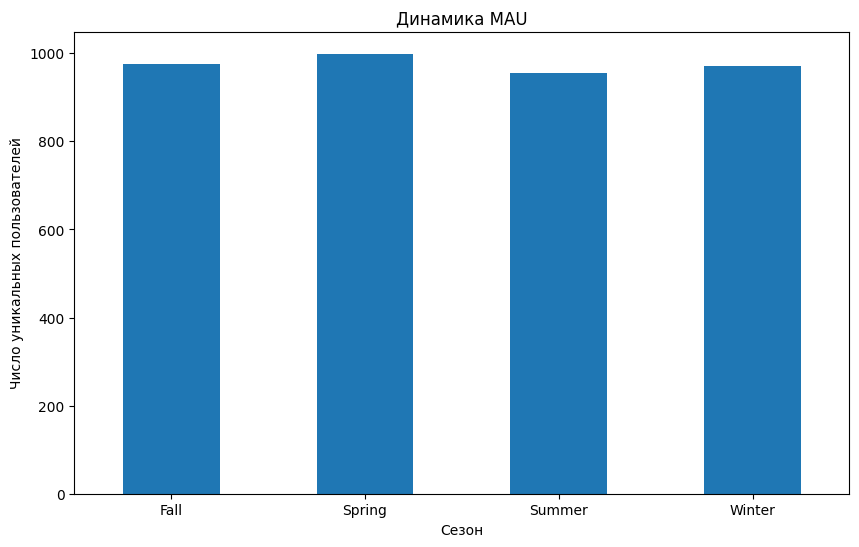

In [926]:
unique_users_by_season = df.groupby("Season")["Customer ID"].nunique()
plt.figure(figsize=(10, 6))
unique_users_by_season.plot(kind="bar")
plt.title("Динамика MAU")
plt.xlabel("Сезон")
plt.ylabel("Число уникальных пользователей")
plt.xticks(rotation=0)
plt.show()

In [927]:
clothing_df = df[df['Category'] == 'Clothing']
clothing_names = clothing_df['Item Purchased'].str.cat(sep=' ').lower()
letters = pd.Series(list(clothing_names))
letter_counts = letters[letters.str.isalpha()].value_counts()

most_common_letter = letter_counts.idxmax()

print(f"Самая популярная буква в названиях одежды в категории Clothing: {most_common_letter}")

Самая популярная буква в названиях одежды в категории Clothing: s


Задание 3

In [928]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

In [929]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


In [930]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [931]:
# Страна с наибольшим потреблением пива
max_beer_country = df.loc[df['beer_servings'].idxmax(), 'country']

# Страна с наибольшим потреблением спиртных напитков
max_spirit_country = df.loc[df['spirit_servings'].idxmax(), 'country']

# Страна с наибольшим потреблением вина
max_wine_country = df.loc[df['wine_servings'].idxmax(), 'country']

print(f"Страна с наибольшим потреблением пива: {max_beer_country}")
print(f"Страна с наибольшим потреблением спиртных напитков: {max_spirit_country}")
print(f"Страна с наибольшим потреблением вина: {max_wine_country}")

Страна с наибольшим потреблением пива: Namibia
Страна с наибольшим потреблением спиртных напитков: Grenada
Страна с наибольшим потреблением вина: France


In [932]:
# Страна с наибольшим потреблением алкоголя в целом
max_alcohol_country = df.loc[df['total_litres_of_pure_alcohol'].idxmax(), 'country']

print(f"Самая пьющая страна в целом: {max_alcohol_country}")

Самая пьющая страна в целом: Belarus


Задание 4

In [933]:
df = pd.read_csv('tarantino.csv')

In [934]:
df

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61
...,...,...,...,...
1889,Jackie Brown,word,motherfucker,141.93
1890,Jackie Brown,word,ass,142.43
1891,Jackie Brown,word,fucking,142.47
1892,Jackie Brown,word,goddamn,142.97


In [935]:
grouped_data = df.groupby('movie')

# Подсчет количества проклятий и смертей для каждого фильма
word_counts = grouped_data['type'].apply(lambda x: (x == 'word').sum())
death_counts = grouped_data['type'].apply(lambda x: (x == 'death').sum())

# Расчет отношения проклятий к смертям
word_to_death_ratio = word_counts / death_counts

for movie, words, deaths, ratio in zip(grouped_data.groups.keys(), word_counts, death_counts, word_to_death_ratio):
    print(f"Фильм: {movie}")
    print(f"Количество проклятий: {words}")
    print(f"Количество смертей: {deaths}")
    print(f"Отношение проклятий к к летальным исходам: {ratio}")
    print()

Фильм: Django Unchained
Количество проклятий: 262
Количество смертей: 47
Отношение проклятий к к летальным исходам: 5.574468085106383

Фильм: Inglorious Basterds
Количество проклятий: 58
Количество смертей: 48
Отношение проклятий к к летальным исходам: 1.2083333333333333

Фильм: Jackie Brown
Количество проклятий: 368
Количество смертей: 4
Отношение проклятий к к летальным исходам: 92.0

Фильм: Kill Bill: Vol. 1
Количество проклятий: 57
Количество смертей: 63
Отношение проклятий к к летальным исходам: 0.9047619047619048

Фильм: Kill Bill: Vol. 2
Количество проклятий: 69
Количество смертей: 11
Отношение проклятий к к летальным исходам: 6.2727272727272725

Фильм: Pulp Fiction
Количество проклятий: 469
Количество смертей: 7
Отношение проклятий к к летальным исходам: 67.0

Фильм: Reservoir Dogs
Количество проклятий: 421
Количество смертей: 10
Отношение проклятий к к летальным исходам: 42.1



In [936]:
# Фильтрация строк с типом 'word'
word_data = df[df['type'] == 'word']

# Подсчет частоты каждого проклятия
word_counts = word_data['word'].value_counts().reset_index()
word_counts.columns = ['Слово', 'Частота']

print(word_counts)

            Слово  Частота
0         fucking      407
1            shit      221
2            fuck      213
3         n-word       179
4             ass      140
5         goddamn      113
6    motherfucker       70
7           bitch       64
8            hell       45
9            damn       37
10  motherfucking       27
11         fucked       25
12       bullshit       15
13  motherfuckers       15
14           dick       14
15          pussy       11
16        asshole       10
17        bastard       10
18        bitches        9
19         fucker        8
20       assholes        5
21         negro         5
22          dicks        5
23          asses        4
24         shitty        4
25         damned        3
26          fucks        3
27       shithead        3
28      horseshit        2
29          gooks        2
30           japs        2
31           cunt        2
32       shitload        2
33     cocksucker        2
34        wetback        2
35        fuckers        1
3

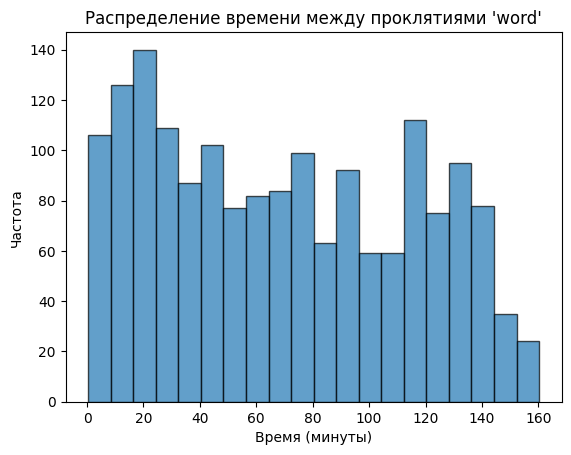

In [937]:
# Фильтрация времен для проклятий
word_minutes = df[df['type'] == 'word']['minutes_in']

plt.hist(word_minutes, bins=20, edgecolor='k', alpha=0.7)
plt.title("Распределение времени между проклятиями 'word'")
plt.xlabel("Время (минуты)")
plt.ylabel("Частота")
plt.show()